In [2]:
#Ejercicio creado por José Pablo Cuevas Cázares el 23/11/18
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as k
%matplotlib inline 
c=k.c
h=k.Planck
k=k.Boltzmann
datos=np.loadtxt('IRCF.txt')
#En este apartado declaro todas las librerías necesarias. También leo los datos del archivo de texto con la librería loadtxt

In [3]:
fr=datos[:,0:1] #Unidades 1/cm
es=datos[:,1:2] #Unidades MJy/sr
inc=datos[:,3:4] #Unidades kJy/sr
m=inc/1000 #Cambio de kJy a MJy
c2=c*100 #Cambio de m a cm para c
s=1/c2 #Equivalencia de 1s es igual a c2
fr2=((pow(fr,-1))*s)
fr3=(pow(fr2,-1))

In [41]:
T=3.2
v=fr3

def I(v,T):
    z=((h*(pow(v,3)))/(pow(c,2)))*(1/((np.exp((h*v)/(k*T)))-1))#En este apartado defino la función de la irradiancia
    return z
z=I(v,T)/(pow(10,-20))#Aquí cambio de irradiancia a Jy, que haciendo el análisis dimensional, es la misma unidad pero multiplicada por un factor de 10^26
print (z)

[[130.90860737]
 [166.75294531]
 [201.01636179]
 [230.9199704 ]
 [256.4109712 ]
 [277.42589772]
 [292.88546951]
 [303.55651187]
 [309.23643956]
 [310.59717787]
 [308.01228837]
 [302.11924532]
 [293.4346057 ]
 [282.21772821]
 [269.4650351 ]
 [255.0941043 ]
 [240.15361787]
 [224.70997136]
 [208.73109067]
 [193.18141251]
 [177.93127008]
 [162.8314863 ]
 [148.67363778]
 [134.93029925]
 [122.26648968]
 [110.41533774]
 [ 99.1598415 ]
 [ 88.98993172]
 [ 79.6379484 ]
 [ 70.89781579]
 [ 63.11597998]
 [ 55.90581556]
 [ 49.53722129]
 [ 43.80053998]
 [ 38.54161735]
 [ 33.94237511]
 [ 29.75127918]
 [ 26.10638661]
 [ 22.86992937]
 [ 19.94306948]
 [ 17.41586423]
 [ 15.18682578]
 [ 13.18386592]]


In [47]:
a=0
for i in range(0,100):
    a=a*a
    print (a)

0
0
0
0
0
0
0
0
0
0


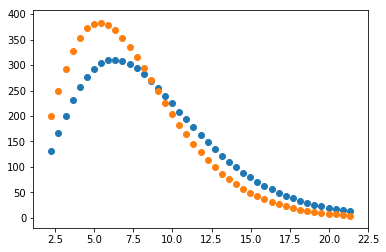

In [42]:
plt.scatter(fr,z)
plt.scatter(fr,es)